In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import chi2

def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',','.'))

In [2]:
lambda_FH = np.array([759.4,686.7,656.3,589.6,589.0,587.6,527.0,518.4,486.1,430.8,396.8,393.4])

symbol_FH = np.array(['A','B','C','D_1','D_2','D_3','E','b_1','F','G','H','K'])

E_Ry = -13.605

hc = 1.2398e3

lambda_1 = 819.10
Fehler_lambda_1 = 1.1
lambda_2 = 590.11
Fehler_lambda_2 = 1.0

E_3p = (E_Ry/(3**2))-(hc/lambda_1)
E_3s = (E_3p - (hc/lambda_2))
Delta_s = 3-np.sqrt(E_Ry/E_3s)
Delta_p = 3-np.sqrt(E_Ry/E_3p)

l_1 = np.zeros(13)
for m in range(3,13):
    l_1[m]=hc/(E_Ry/m**2-E_3p)
    print('m={m:2d}, lambda_1={l:6.2f}'.format(m=m, l=l_1[m]))
    
print('\n') 

l_2 = np.zeros(10)
for m in range(4,10):
    l_2[m]=hc/(E_Ry/(m-Delta_s)**2-E_3p)
    print('m={m:2d}, lambda_2={l:6.2f}'.format(m=m, l=l_2[m]))
    
print('\n')

l_3 = np.zeros(6)
for m in range(4,6):
    l_3[m]=hc/(E_Ry/(m-Delta_p)**2-E_3s)
    print('m={m:2d}, lambda_3={l:6.2f}'.format(m=m, l=l_3[m]))  

m= 3, lambda_1=819.10
m= 4, lambda_1=570.03
m= 5, lambda_1=499.70
m= 6, lambda_1=468.32
m= 7, lambda_1=451.23
m= 8, lambda_1=440.79
m= 9, lambda_1=433.90
m=10, lambda_1=429.11
m=11, lambda_1=425.63
m=12, lambda_1=423.02


m= 4, lambda_2=1172.92
m= 5, lambda_2=622.30
m= 6, lambda_2=518.66
m= 7, lambda_2=477.60
m= 8, lambda_2=456.53
m= 9, lambda_2=444.13


m= 4, lambda_3=332.46
m= 5, lambda_3=286.66


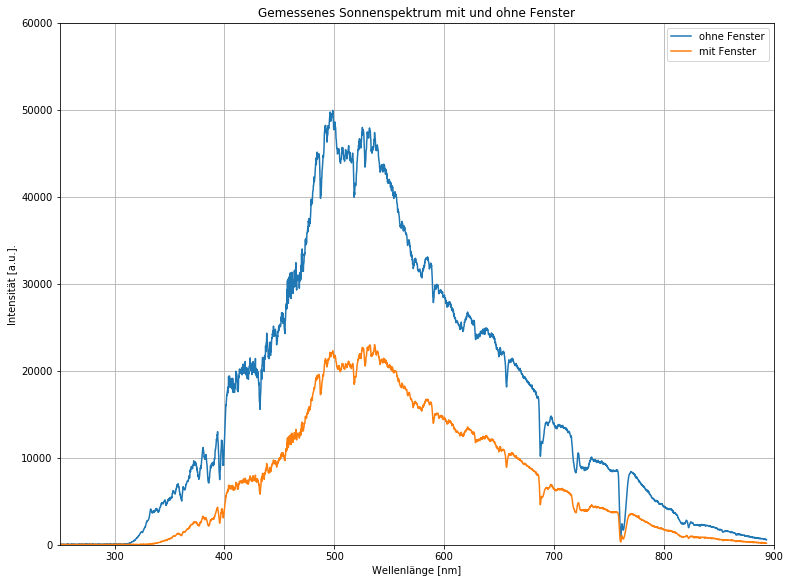

In [3]:
lamb_Himmel_frei, inten_Himmel_frei=np.loadtxt('data/Himmel_frei.txt', skiprows=17, 
                                               converters= {0:comma_to_float, 1:comma_to_float}, 
                                               comments='>', unpack=True)

lamb_Himmel_Fenster, inten_Himmel_Fenster=np.loadtxt('data/Himmel_Fenster.txt', skiprows=17, 
                                                     converters= {0:comma_to_float, 1:comma_to_float}, 
                                                     comments='>', unpack=True)

fig, ax = plt.subplots(1, figsize=[6.4 *2, 4.8 *2])
plt.plot(lamb_Himmel_frei, inten_Himmel_frei, label='ohne Fenster', color='C0')
plt.plot(lamb_Himmel_Fenster, inten_Himmel_Fenster, label='mit Fenster', color='C1')
plt.title('Gemessenes Sonnenspektrum mit und ohne Fenster')
plt.xlabel('Wellenlänge [nm]')
plt.ylabel('Intensität [a.u.].')
plt.legend()
plt.grid()
plt.ylim((0,60000))
plt.xlim((250,900))
plt.savefig('figures/234_Fig1.pdf', format='pdf')

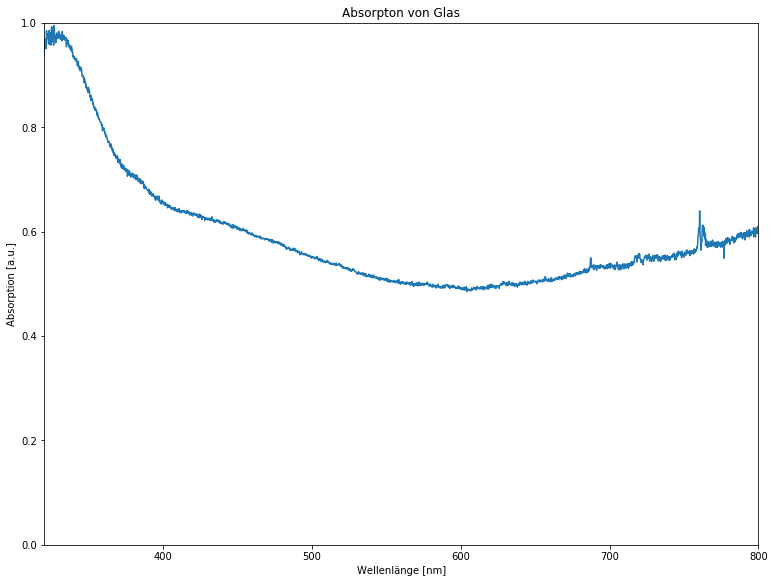

In [4]:
fig, ax = plt.subplots(1, figsize=[6.4 *2, 4.8 *2])
A=1-inten_Himmel_Fenster/inten_Himmel_frei
plt.plot(lamb_Himmel_Fenster, A, color='C0')
plt.title('Absorpton von Glas')
plt.xlabel('Wellenlänge [nm]')
plt.ylabel('Absorption [a.u.]')
plt.ylim((0,1))
plt.xlim((320,800))
plt.savefig('figures/234_Fig2.pdf', format='pdf')


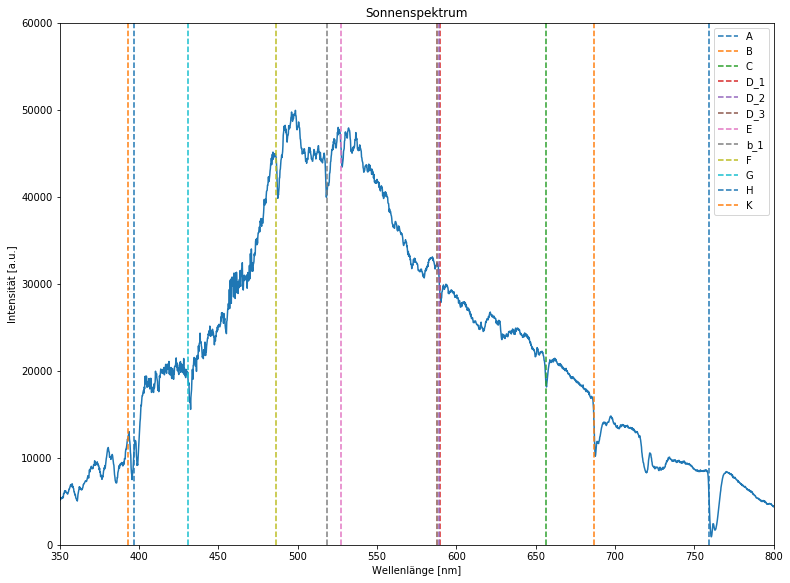

In [5]:
fig, ax = plt.subplots(1, figsize=[6.4 *2, 4.8 *2])
plt.plot(lamb_Himmel_frei, inten_Himmel_frei, color='C0')
plt.title('Sonnenspektrum')
plt.xlabel('Wellenlänge [nm]')
plt.ylabel('Intensität [a.u.]')

for x in range(0, lambda_FH.size):
    plt.axvline(x=lambda_FH[x],color='C'+str(x%10),linestyle='--', label=symbol_FH[x])

plt.legend()    
plt.ylim((0,60000))
plt.xlim((350,800))
plt.savefig("figures/234_Fig3.pdf", format="pdf")



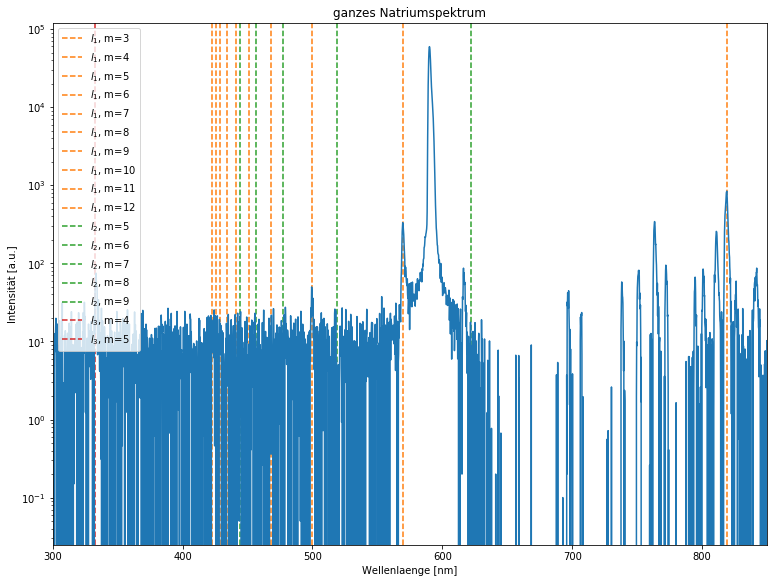

In [6]:
lamb_Na_1, inten_Na_1=np.loadtxt('data/Linien_intensiv.txt', skiprows=17, 
                                 converters= {0:comma_to_float, 1:comma_to_float},
                                 comments='>', unpack=True)
    
fig, ax = plt.subplots(1, figsize=[6.4 *2, 4.8 *2])
for x in range(3, 13):
    plt.axvline(x=l_1[x],color='C1',linestyle='--',label='$l_1$, m='+str(x))
for x in range(5, 10):
    plt.axvline(x=l_2[x],color='C2',linestyle='--',label='$l_2$, m='+str(x))
for x in range(4, 6):
    plt.axvline(x=l_3[x],color='C3',linestyle='--',label='$l_3$, m='+str(x))
plt.legend()
plt.plot(lamb_Na_1, inten_Na_1, color='C0')
plt.title('ganzes Natriumspektrum')
plt.xlabel('Wellenlaenge [nm]')
plt.ylabel('Intensität [a.u.]')
plt.yscale('log')
plt.xlim((300,850))
plt.savefig("figures/234_Fig4.pdf", format="pdf")

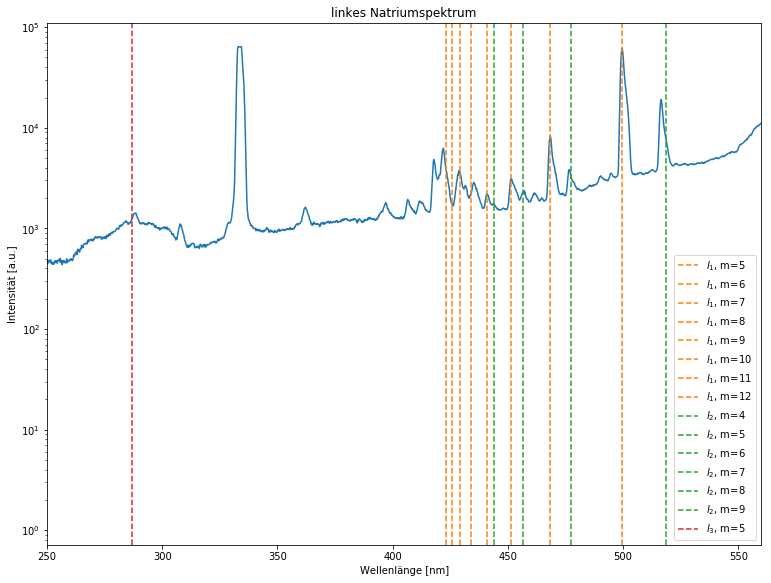

In [7]:
lamb_Na_2, inten_Na_2=np.loadtxt('data/Linien_schwach_links.txt', skiprows=17, 
                                 converters= {0:comma_to_float, 1:comma_to_float},
                                 comments='>', unpack=True)
    
fig, ax = plt.subplots(1, figsize=[6.4 *2, 4.8 *2])
plt.plot(lamb_Na_2, inten_Na_2, color='C0')
for x in range(3+2, 13):
    plt.axvline(x=l_1[x],color='C1',linestyle='--',label='$l_1$, m='+str(x))
for x in range(4, 10):
    plt.axvline(x=l_2[x],color='C2',linestyle='--',label='$l_2$, m='+str(x))
for x in range(5, 6):
    plt.axvline(x=l_3[x],color='C3',linestyle='--',label='$l_3$, m='+str(x))
plt.legend()  
plt.title('linkes Natriumspektrum')
plt.xlabel('Wellenlänge [nm]')
plt.ylabel('Intensität [a.u.]')
plt.yscale('log')
plt.xlim((250,560))
plt.savefig("figures/234_Fig5.pdf", format="pdf")

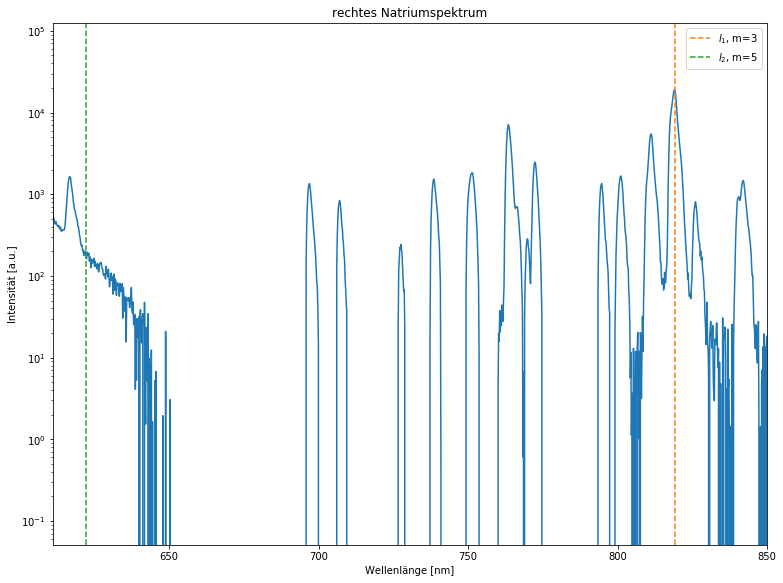

In [8]:
lamb_Na_3, inten_Na_3=np.loadtxt('data/Linien_schwach_rechts.txt', skiprows=17, 
                                 converters= {0:comma_to_float, 1:comma_to_float},
                                 comments='>', unpack=True)

fig, ax = plt.subplots(1, figsize=[6.4 *2, 4.8 *2])
plt.plot(lamb_Na_3, inten_Na_3, color='C0')
for x in range(3, 4):
    plt.axvline(x=l_1[x],color='C1',linestyle='--',label='$l_1$, m='+str(x))
for x in range(5, 6):
    plt.axvline(x=l_2[x],color='C2',linestyle='--',label='$l_2$, m='+str(x))
plt.legend()
plt.title('rechtes Natriumspektrum')
plt.xlabel('Wellenlänge [nm]')
plt.ylabel('Intensität [a.u.]')
plt.yscale('log')
plt.xlim((611,850))
plt.savefig("figures/234_Fig6.pdf", format="pdf")

E_Ry= -13.430802196005462 , Standardfehler= 0.1969037355602265
E_3p= -3.0226057905535195 , Standardfehler= 0.003158161826131589
Delta_d= 0.0165722750831767 , Standardfehler= 0.019318306201450464
Chi-Quadrat = 1.5979187130426897
Freiheitsgrade = 6
Chi-Quadrat reduziert = 0.26631978550711494
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 95.0 %


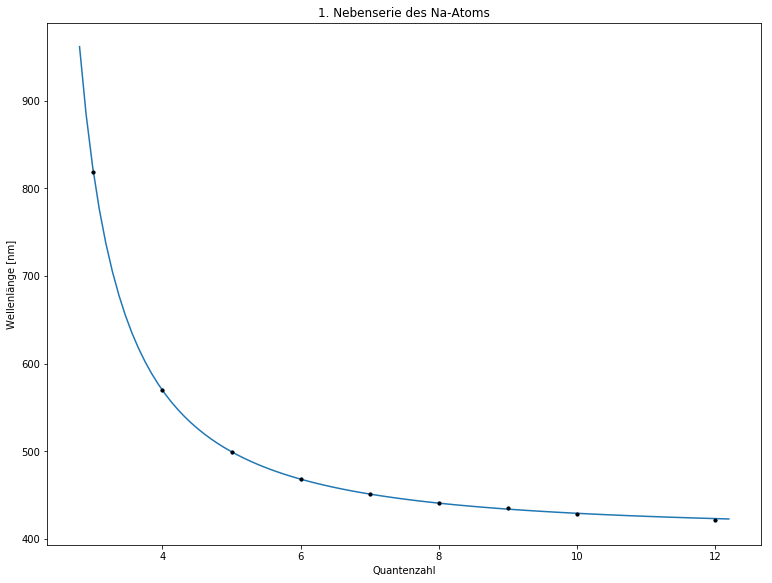

In [9]:
wellenl=np.array([819.10,569.53,499.60,468.39,451.44,440.98,435.22,428.84,422.03])
fehler=np.array([1.1,1.0,1.1,1.2,1.2,0.8,1.3,1.2,1.6])
quantenz=np.array([3,4,5,6,7,8,9,10,12])

from scipy.optimize import curve_fit

def fit_func(m,E_Ry,E_3p,Delta_d):
    return hc/(E_Ry/(m-Delta_d)**2-E_3p)

para = [-13.6,-3,-0.02]
popt, pcov = curve_fit(fit_func, quantenz, wellenl,
sigma=fehler ,p0=para)

fig, ax = plt.subplots(1, figsize=[6.4 *2, 4.8 *2])
plt.errorbar(quantenz,wellenl,fehler, fmt=".")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlaenge / nm')
plt.title('1. Nebenserie des Na-Atoms')
plt.errorbar(quantenz,wellenl,fehler, fmt=".", color='k',)
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlänge [nm]')
plt.title('1. Nebenserie des Na-Atoms')
x=np.linspace(2.8,12.2, 100)
plt.plot(x, fit_func(x,*popt), color='C0')
plt.savefig("figures/234_Fig7.pdf", format="pdf")

chisquare =np.sum((fit_func(quantenz,*popt)-wellenl)**2/fehler**2)
dof=len(quantenz)-3 #dof:degrees of freedom, Freiheitsgrad
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100



print("E_Ry=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0]))
print("E_3p=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1]))
print("Delta_d=",popt[2], ", Standardfehler=", np.sqrt(pcov[2][2]))
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')

E_Ry= -13.126297627419813 , Standardfehler= 0.2742891385530246
E_3p= -3.0182055025822163 , Standardfehler= 0.004344244415603463
Delta_s= 1.3912144565425775 , Standardfehler= 0.030426992519524913
Chi-Quadrat = 0.05378510189855742
Freiheitsgrade = 2
Chi-Quadrat reduziert = 0.02689255094927871
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 97.0 %


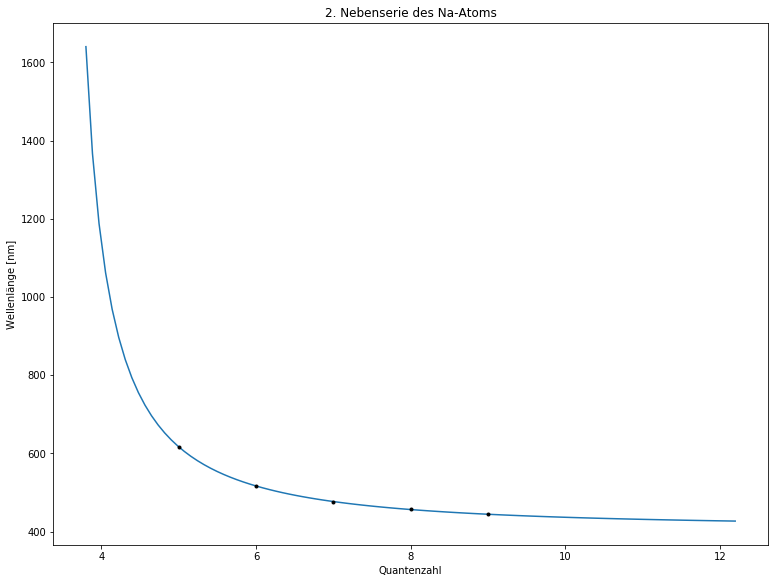

In [10]:
wellenl_2=np.array([616.73,516.49,476.73,456.55,443.85])
fehler_2=np.array([1.0,1.1,2.0,2.0,2.0])
quantenz_2=np.array([5,6,7,8,9])

from scipy.optimize import curve_fit

def fit_func(m,E_Ry,E_3p,Delta_s):
    return hc/(E_Ry/(m-Delta_s)**2-E_3p)

para = [-13.6,-3,-0.02]
popt, pcov = curve_fit(fit_func, quantenz_2, wellenl_2,
sigma=fehler_2 ,p0=para)

fig, ax = plt.subplots(1, figsize=[6.4 *2, 4.8 *2])
plt.errorbar(quantenz_2,wellenl_2,fehler_2, fmt=".", color='k',)
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlänge [nm]')
plt.title('2. Nebenserie des Na-Atoms')
x=np.linspace(3.8,12.2, 100)
plt.plot(x, fit_func(x,*popt), color='C0')
plt.savefig("figures/234_Fig8.pdf", format="pdf")

chisquare =np.sum((fit_func(quantenz_2,*popt)-wellenl_2)**2/fehler_2**2)
dof=len(quantenz_2)-3 #dof:degrees of freedom, Freiheitsgrad
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

print("E_Ry=",popt[0], ", Standardfehler=", np.sqrt(pcov[0][0]))
print("E_3p=",popt[1], ", Standardfehler=", np.sqrt(pcov[1][1]))
print("Delta_s=",popt[2], ", Standardfehler=", np.sqrt(pcov[2][2]))
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')

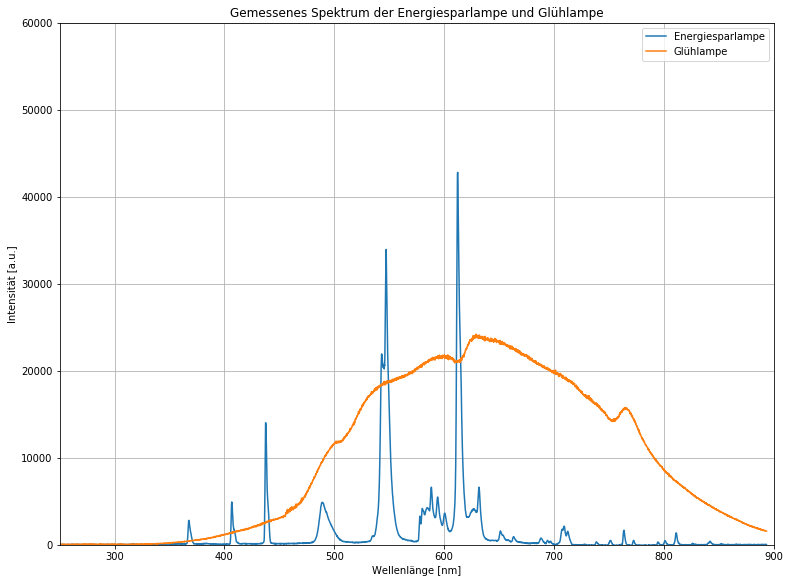

In [11]:
lamb_1, inten_1=np.loadtxt('data/Energiesparlampe.txt', skiprows=17, 
                                               converters= {0:comma_to_float, 1:comma_to_float}, 
                                               comments='>', unpack=True)

lamb_2, inten_2=np.loadtxt('data/Glühlampe.txt', skiprows=17, 
                                               converters= {0:comma_to_float, 1:comma_to_float}, 
                                               comments='>', unpack=True)

fig, ax = plt.subplots(1, figsize=[6.4 *2, 4.8 *2])
plt.plot(lamb_1, inten_1, label='Energiesparlampe', color='C0')
plt.plot(lamb_2, inten_2, label='Glühlampe', color='C1')
plt.title('Gemessenes Spektrum der Energiesparlampe und Glühlampe')
plt.xlabel('Wellenlänge [nm]')
plt.ylabel('Intensität [a.u.]')
plt.legend()
plt.grid()
plt.ylim((0,60000))
plt.xlim((250,900))
plt.savefig('figures/234_Fig9.pdf', format='pdf')



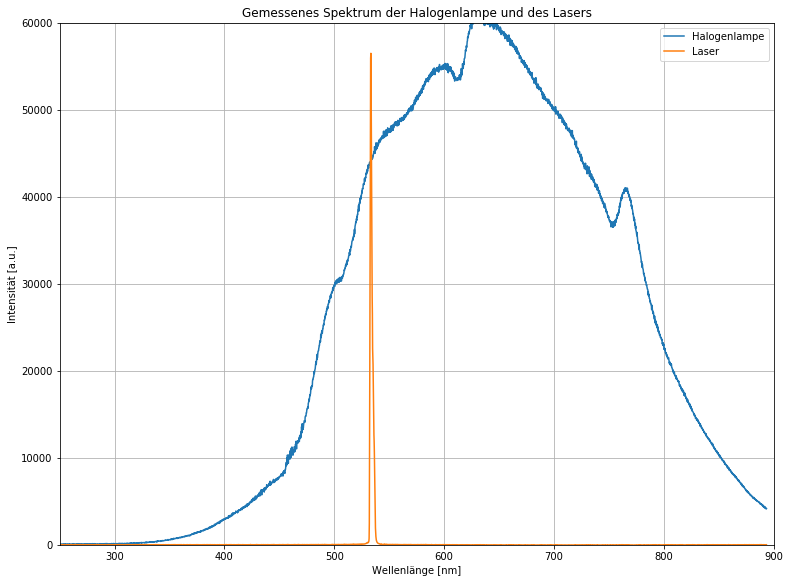

In [17]:
lamb_1, inten_1=np.loadtxt('data/Halogenlampe.txt', skiprows=17, 
                                               converters= {0:comma_to_float, 1:comma_to_float}, 
                                               comments='>', unpack=True)

lamb_2, inten_2=np.loadtxt('data/Laser.txt', skiprows=17, 
                                               converters= {0:comma_to_float, 1:comma_to_float}, 
                                               comments='>', unpack=True)

fig, ax = plt.subplots(1, figsize=[6.4 *2, 4.8 *2])
plt.plot(lamb_1, inten_1, label='Halogenlampe', color='C0')
plt.plot(lamb_2, inten_2, label='Laser', color='C1')
plt.title('Gemessenes Spektrum der Halogenlampe und des Lasers')
plt.xlabel('Wellenlänge [nm]')
plt.ylabel('Intensität [a.u.]')
plt.legend()
plt.grid()
plt.ylim((0,60000))
plt.xlim((250,900))
plt.savefig('figures/234_Fig10.pdf', format='pdf')

0.010404486090106382
0.000919829837165105
0.011736172960851037
0.005685680632677099


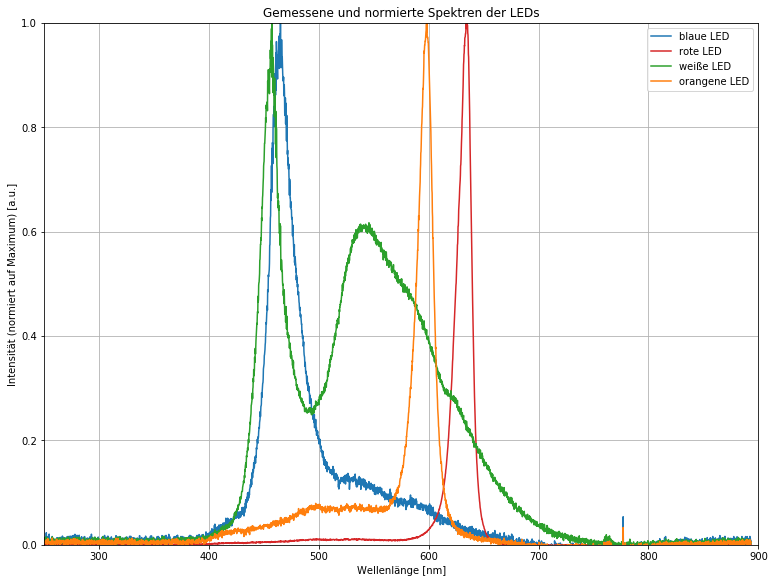

In [14]:
lamb_1, inten_1=np.loadtxt('data/LED_blau.txt', skiprows=17, 
                                               converters= {0:comma_to_float, 1:comma_to_float}, 
                                               comments='>', unpack=True)

lamb_2, inten_2=np.loadtxt('data/LED_rot.txt', skiprows=17, 
                                               converters= {0:comma_to_float, 1:comma_to_float}, 
                                               comments='>', unpack=True)

lamb_3, inten_3=np.loadtxt('data/LED_weiß.txt', skiprows=17, 
                                               converters= {0:comma_to_float, 1:comma_to_float}, 
                                               comments='>', unpack=True)

lamb_4, inten_4=np.loadtxt('data/LED_orange.txt', skiprows=17, 
                                               converters= {0:comma_to_float, 1:comma_to_float}, 
                                               comments='>', unpack=True)

inten_1= inten_1/max(inten_1)
inten_2= inten_2/max(inten_2)
inten_3= inten_3/max(inten_3)
inten_4= inten_4/max(inten_4)

fig, ax = plt.subplots(1, figsize=[6.4 *2, 4.8 *2])
plt.plot(lamb_1, inten_1, label='blaue LED', color='C0')
plt.plot(lamb_2, inten_2, label='rote LED', color='C3')
plt.plot(lamb_3, inten_3, label='weiße LED', color='C2')
plt.plot(lamb_4, inten_4, label='orangene LED', color='C1')
plt.title('Gemessene und normierte Spektren der LEDs')
plt.xlabel('Wellenlänge [nm]')
plt.ylabel('Intensität (normiert auf Maximum) [a.u.]')
plt.legend()
plt.grid()
plt.ylim((0,1))
plt.xlim((250,900))
plt.savefig('figures/234_Fig11.pdf', format='pdf')